In [47]:
import math
import numpy as np
import pandas as pd
from scipy import stats as stats
import matplotlib.pyplot as plt
distributions = (
        (stats.norm, (0, 1), 'Normal_distribution', (-4, 4)), 
        (stats.cauchy, (0, 1), 'Cauchy_distribution', (-4, 4)), 
        (stats.laplace, (0, 1/math.sqrt(2)), 'Laplace_distribution', (-4, 4)), 
        (stats.uniform, (-math.sqrt(3), 2*math.sqrt(3)), 'Uniform_distribution', (-4, 4)),
        (stats.poisson, (10, 0), 'Poisson_distribution', (6, 14))
    )

        
def disrt_generator(sample_size):
    for case in distributions:
        yield case[0].rvs(*case[1], sample_size), lambda x: case[0].cdf(x, *case[1]), case[2], case[3]
        
def get_points(boarders, func, step=0.05):
    x = np.arange(boarders[0], boarders[1], step)
    y = list(map(func, x)) 

    return x, y

def get_distr_func(sample):
    s = sample
    
    def F(x):
        return (len(s[s <= x])) / len(s)
    
    return F

def draw_plot(functions, name, boarders):
    fig, ax = plt.subplots(1, 1)
    for f in functions:
        ax.plot(*get_points(boarders, f))
    plt.xlim(boarders)
    plt.title(name+' n = '+ str(size))
    plt.xlabel('Values')
    plt.ylabel('Distribution')
    plt.savefig(name+str(size))
    

0.090079225719216
0.090079225719216
0.090079225719216


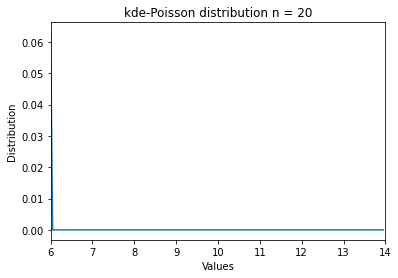

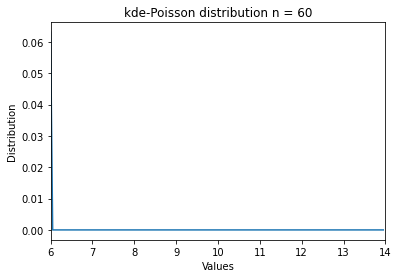

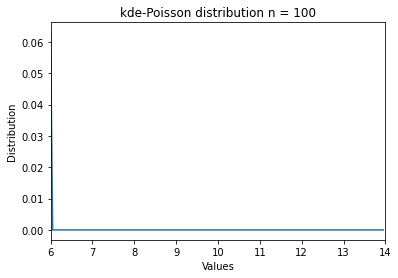

In [49]:
sizes = [20, 60, 100]

for size in sizes:
    for case in discrete_generator(size):
        sample, func, name = case
        kde = stats.gaussian_kde(sample)
        kde.set_bandwidth(bw_method='silverman')
        print(func(7))
        draw_plot((func,), 'kde-' + name, boarders)

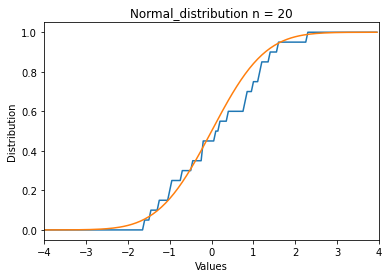

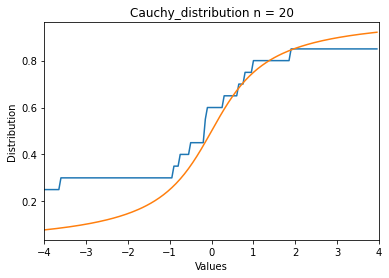

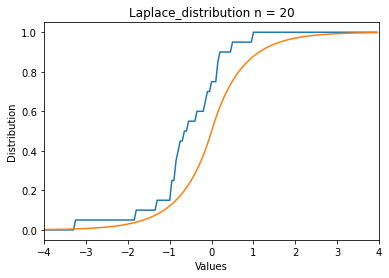

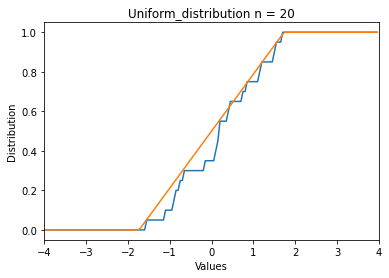

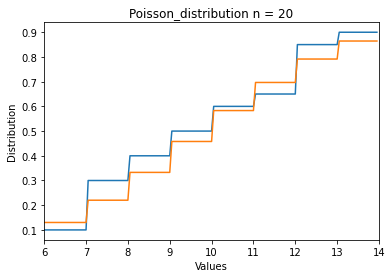

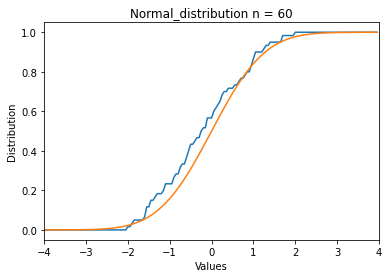

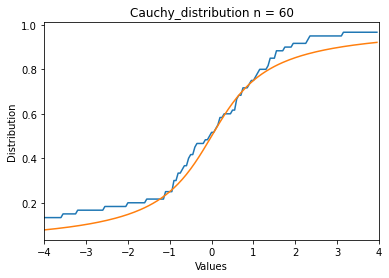

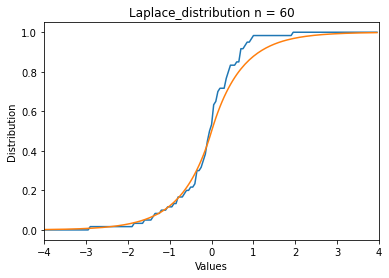

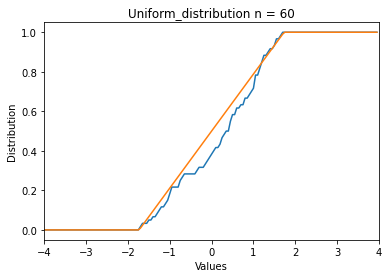

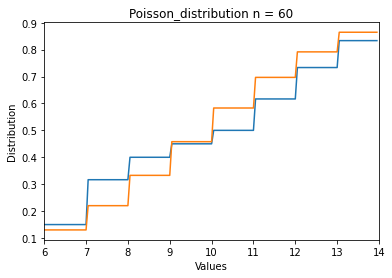

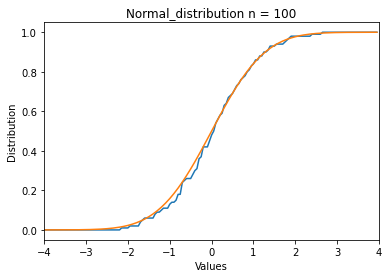

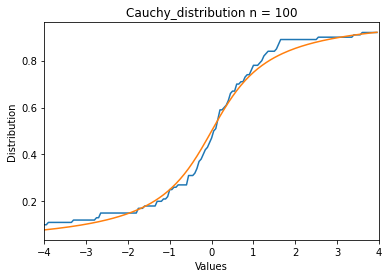

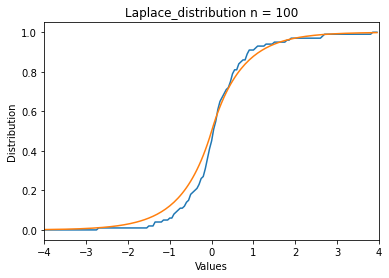

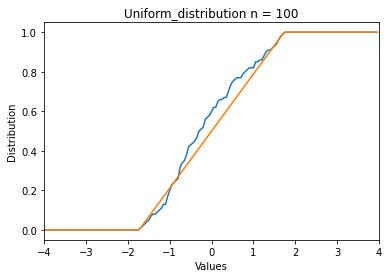

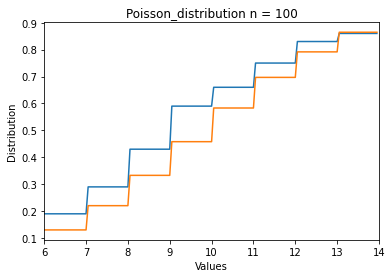

In [39]:
sizes = [20, 60, 100]

for size in sizes:
    for case in disrt_generator(size):
        sample, func, name, boarders = case
        draw_plot((get_distr_func(sample), func), name, boarders)

In [77]:
def get_range(sample):
    # return tuple with min and max values from the sample
    # if max-min value is too large(bigger than 200), divides the segment until it reaches a small value
    a, b = math.floor(min(sample)), math.ceil(max(sample))
    while b - a > 200:
        b /= 2
        a /=2
        
    return (a, b)

def get_partition(sample, step):
    x_min, x_max = get_range(sample)
    n = math.ceil((x_max-x_min) / step)
    
    return [x_min+step*i for i in range(n+1)]

def get_points(boarders, func, step=0.05):
    x = np.arange(boarders[0], boarders[1], step)
    y = func(x)

    return x, y

def func_generator(sample_size):
    cases = (
        (stats.norm, (0, 1), 'Normal distribution', (-4,4), 0.05), 
        (stats.cauchy, (0, 1), 'Cauchy distribution', (-4,4), 0.05), 
        (stats.laplace, (0, 1/math.sqrt(2)), 'Laplace distribution', (-4,4), 0.05), 
        (stats.uniform, (-math.sqrt(3), 2*math.sqrt(3)), 'Uniform distribution', (-4,4), 0.05)
    )
    
    d_cases = (stats.poisson, (10, 0), 'Poisson distribution', (6,14), 1)
    
    for case in cases:
        yield case[0].rvs(*case[1], sample_size), lambda x: case[0].pdf(x, *case[1]), case[2], case[3], case[4]
    
    yield d_cases[0].rvs(*d_cases[1], sample_size), lambda x: d_cases[0].pmf(x, *d_cases[1]), d_cases[2], d_cases[3], d_cases[4]


def h(sample):
    return 1.06 * math.sqrt(np.var(sample)) * len(sample)**(1/5)

def draw_pictures(size):
    for x in func_generator(size):
        for m in [1/2, 1, 2]:
            sample, dist_func, name, boarders, step = x

            kde = stats.gaussian_kde(sample)
            kde.set_bandwidth(bw_method=kde.factor * m)
            fig, ax = plt.subplots(1, 1)

            ax.plot(*get_points(boarders, kde.pdf, step))
            ax.plot(*get_points(boarders, dist_func, step))

            plt.title(name + ' n = '+ str(size))
            plt.xlabel('Values')
            plt.ylabel('Density')
            plt.savefig('kde'+str(m)+name+str(size)+'.png')

C:\Users\Mi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


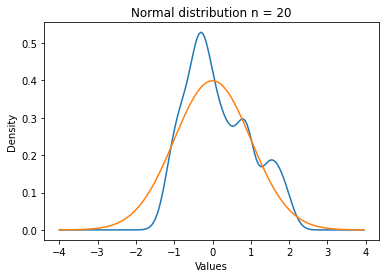

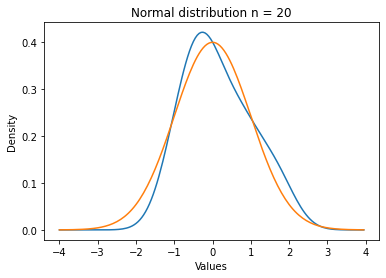

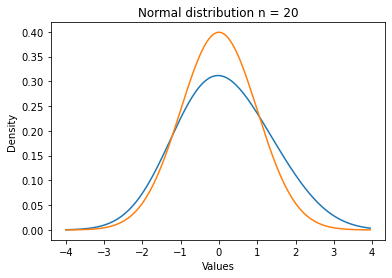

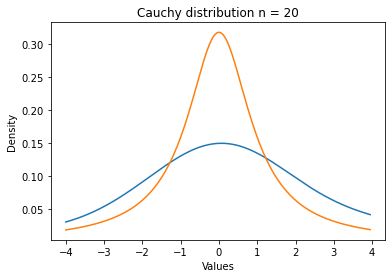

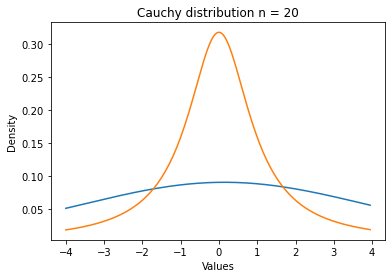

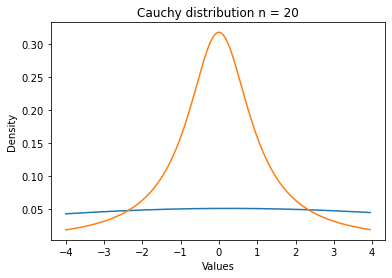

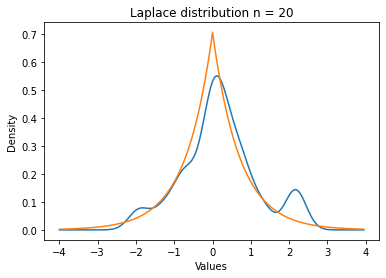

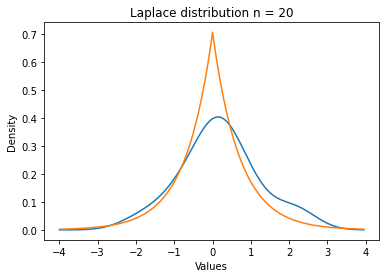

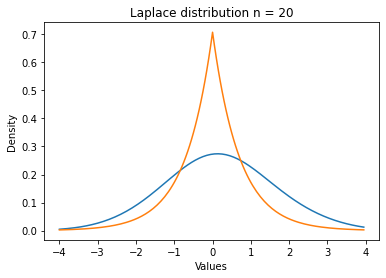

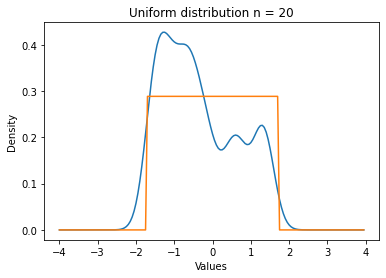

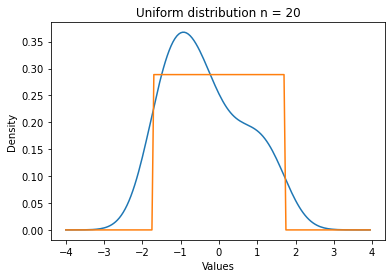

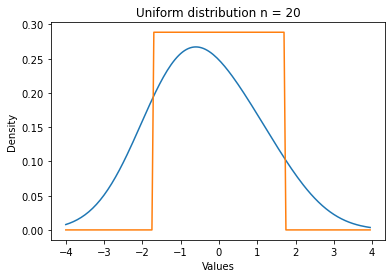

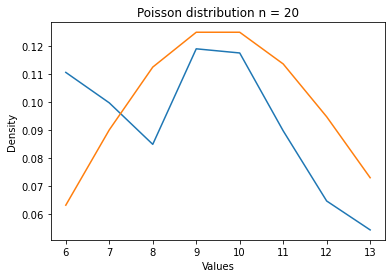

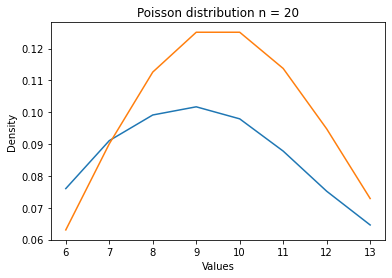

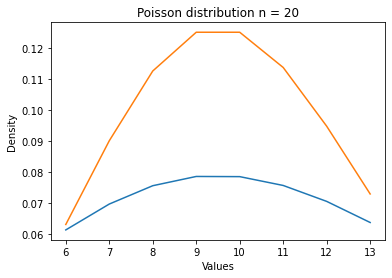

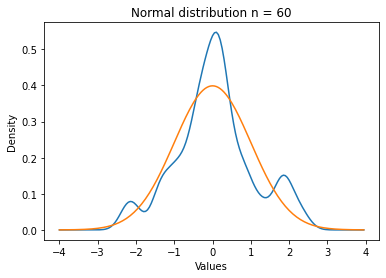

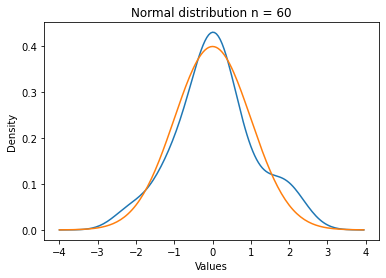

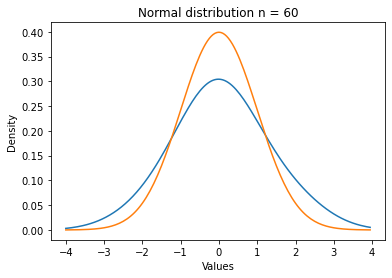

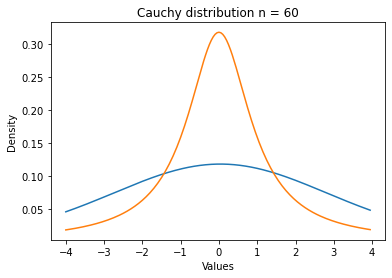

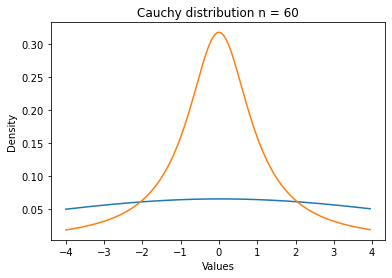

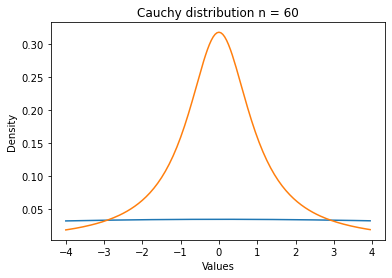

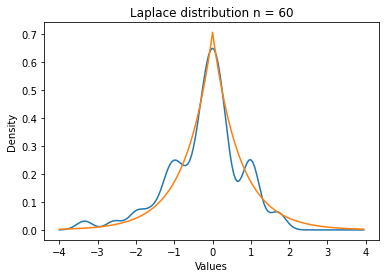

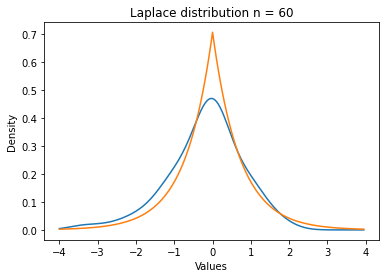

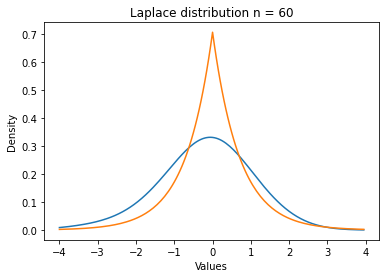

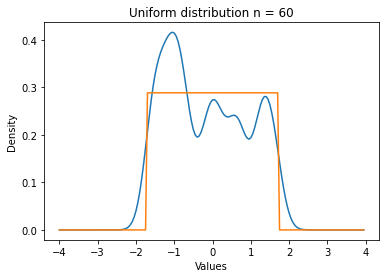

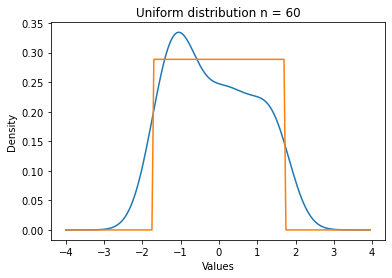

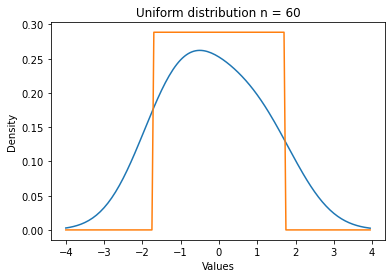

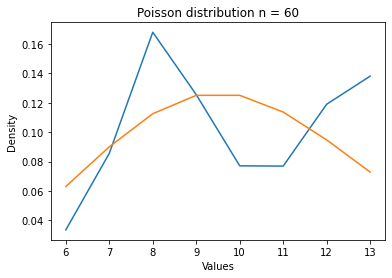

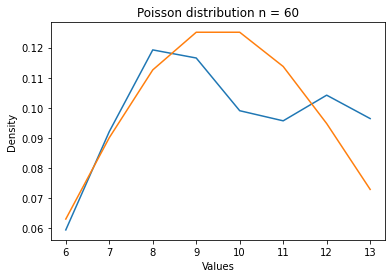

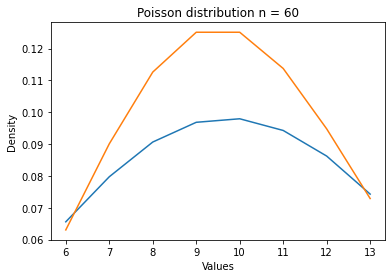

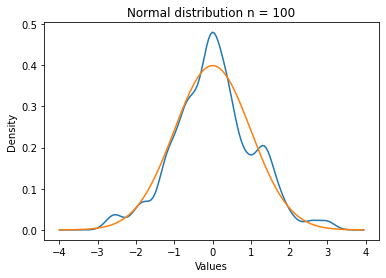

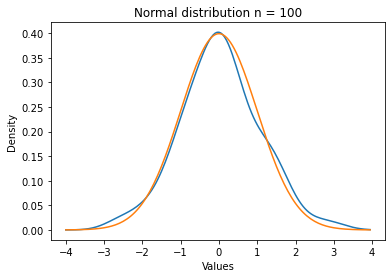

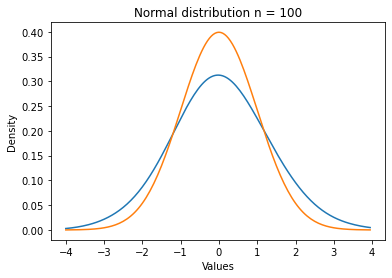

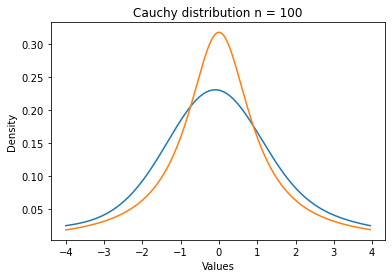

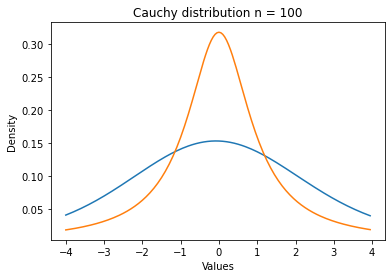

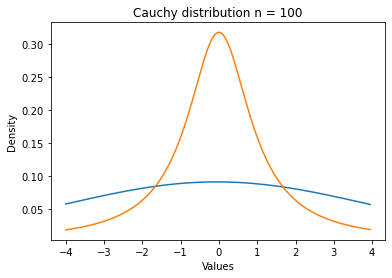

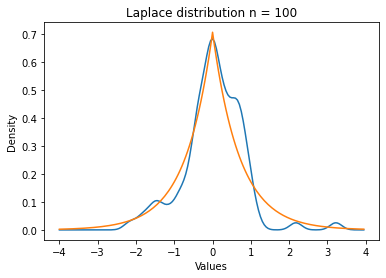

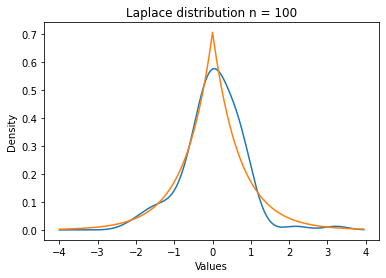

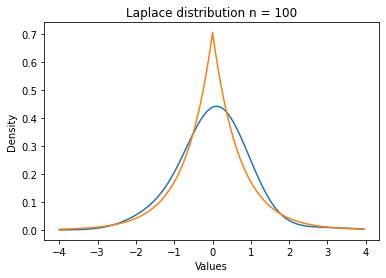

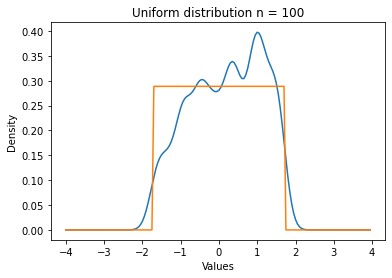

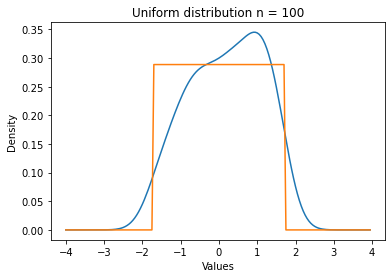

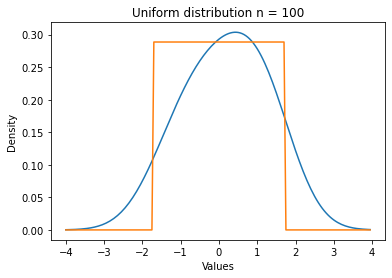

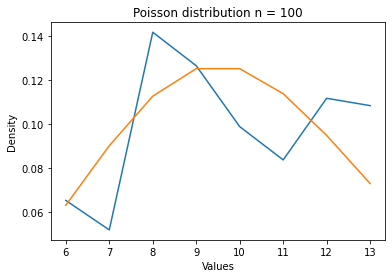

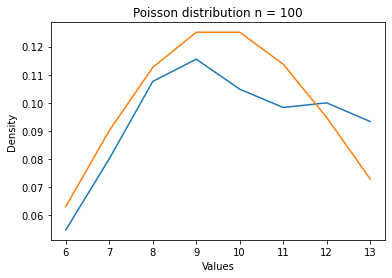

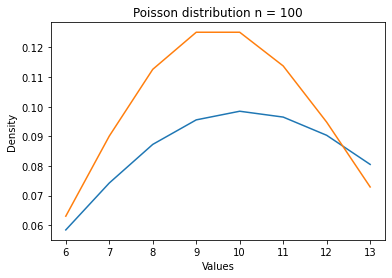

In [78]:
for size in [20, 60, 100]:
    draw_pictures(size)